<a href="https://colab.research.google.com/github/ishrakM/DeepLearning/blob/main/EDM/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Data


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os
print(os.listdir("/content/drive/MyDrive/mdata/input"))
plt.style.use('bmh')

['measures_v2.csv']


Reading Data from google drive

In [ ]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/mdata/input/measures_v2.csv')
target_features = ['pm', 'stator_tooth', 'stator_yoke', 'stator_winding'] #4 columns are our target variable 
df.shape

(1330816, 13)

Visualizing and exploring Data

In [ ]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [ ]:
#each column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

#no null value in any column

profile_id        0
torque            0
ambient           0
stator_yoke       0
pm                0
i_q               0
i_d               0
motor_speed       0
stator_tooth      0
u_d               0
stator_winding    0
coolant           0
u_q               0
dtype: int64

Data correlation 

In [ ]:
#Table corelation

df.corr()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
u_q,1.000000,0.051721,0.050610,0.004702,0.104373,0.683556,-0.100357,-0.124589,0.122365,0.090992,0.150264,-0.136215,-0.030499
coolant,0.051721,1.000000,0.504835,0.195517,0.674974,0.011872,0.074865,-0.256389,0.467117,0.860750,0.525963,-0.257982,0.635797
stator_winding,0.050610,0.504835,1.000000,-0.234950,0.970135,0.432034,-0.624370,0.065617,0.795893,0.860268,0.333208,0.095510,0.340580
u_d,0.004702,0.195517,-0.234950,1.000000,-0.142749,-0.288472,0.448331,-0.723069,-0.172031,-0.008098,0.203647,-0.753779,0.263264
stator_tooth,0.104373,0.674974,0.970135,-0.142749,1.000000,0.398431,-0.487062,-0.042294,0.832084,0.953115,0.443470,-0.018413,0.450821
motor_speed,0.683556,0.011872,0.432034,-0.288472,0.398431,1.000000,-0.700609,-0.068881,0.458947,0.255790,0.118232,-0.043903,-0.028585
i_d,-0.100357,0.074865,-0.624370,0.448331,-0.487062,-0.700609,1.000000,-0.231344,-0.427736,-0.278005,0.016397,-0.274097,0.053524
i_q,-0.124589,-0.256389,0.065617,-0.723069,-0.042294,-0.068881,-0.231344,1.000000,-0.142416,-0.131466,-0.314044,0.996457,-0.324654
pm,0.122365,0.467117,0.795893,-0.172031,0.832084,0.458947,-0.427736,-0.142416,1.000000,0.756684,0.513728,-0.117138,0.386241
stator_yoke,0.090992,0.860750,0.860268,-0.008098,0.953115,0.255790,-0.278005,-0.131466,0.756684,1.000000,0.520382,-0.117118,0.563437


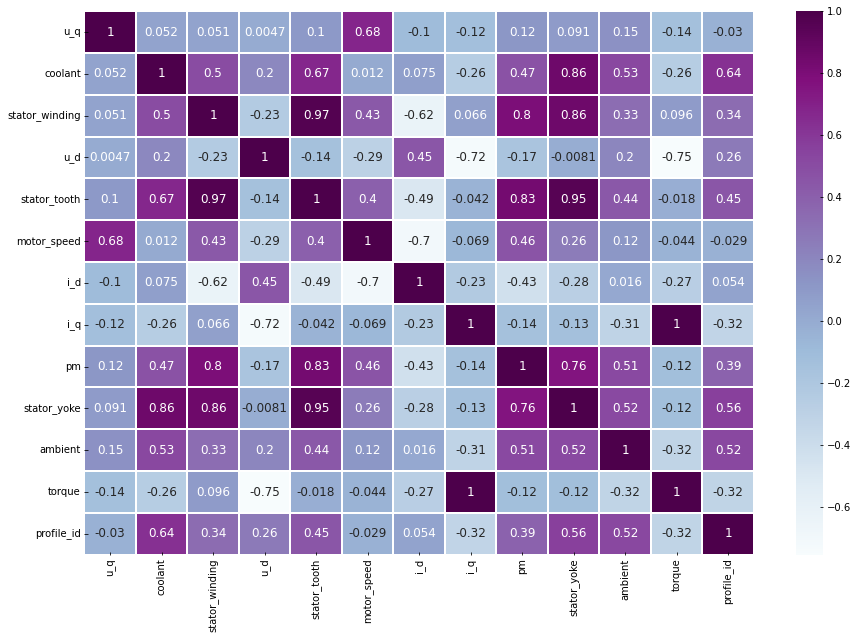

In [ ]:
#Visual correlation
import matplotlib.pyplot as mp
  
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(15,10))
dataplot = sns.heatmap(df.corr(), cmap="BuPu", annot=True, linewidths=1, annot_kws={"size": 12} )

#dataplot.set(xlabel='x label', ylabel='y label')
# displaying heatmap... PiYG .. YlGnBu.. sb
mp.show()

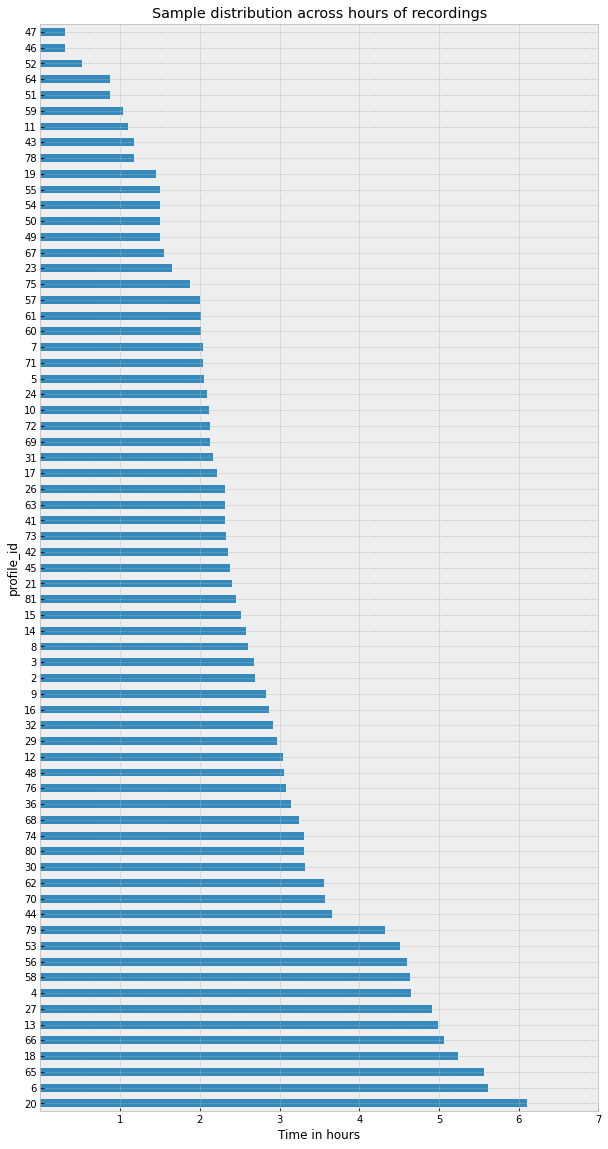

In [ ]:
p_counts = df.groupby('profile_id')['pm'].agg('count').sort_values(ascending=False)

ax = p_counts.plot.barh(figsize=(10, 20), title='Sample distribution across hours of recordings')
_ = ax.set_xticks(2*3600*np.arange(1, 8)) # 2Hz sample rate, so 2 X 3600 seconds (1 hour)
_ = ax.set_xticklabels(list(range(1, 8)))
_ = ax.set_xlabel('Time in hours')

#p_counts.sort_values(ascending=True)

#p_counts.sort_values('profile_id', ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

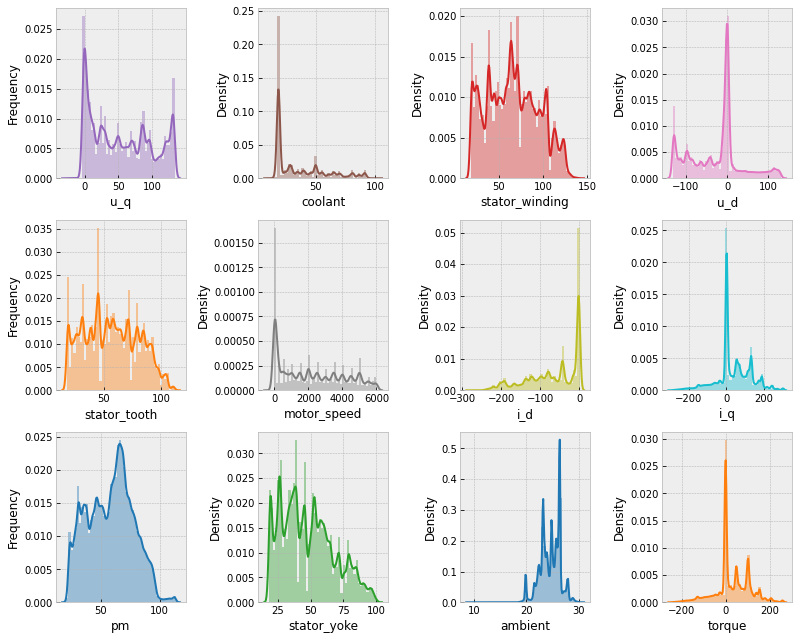

In [ ]:
dfui = df.drop(['profile_id'], axis=1)  # dataframe under investigation

# prepare colors
color_list = plt.cm.tab10(np.linspace(0, 1, 10)[list(range(10))+[0, 1]])
coi = target_features + [c for c in dfui if c not in target_features]  # columns of interest
feat_clrs = {k: rgb2hex(color_list[i][:3]) for i, k in enumerate(coi)} if color_list is not None else {}

n_cols = 4
n_rows = np.ceil(dfui.shape[1] / n_cols).astype(int)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.8*n_cols, n_rows*3))
for i, (ax, col) in enumerate(zip(axes.flatten(), list(dfui.columns))):
    sns.distplot(dfui[col], color=feat_clrs[col], ax=ax)
    if i % n_cols == 0:
        ax.set_ylabel('Frequency')
plt.tight_layout()

In [ ]:
# We are taking 65 and 72 profile ID data for test run. Here we visualize only first 10 row of each test run profile_id

train = df.query('profile_id!=65 & profile_id!=72')

test1 = df[df['profile_id'] == 65]
test2 = df[df['profile_id'] == 72]

print(test1.shape)
print(test1.head(n=10).to_string(index=False))


print("")
print("")

print(test2.shape)
print(test2.head(n=10).to_string(index=False))

(40094, 13)
      u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed         i_d        i_q         pm  stator_yoke    ambient     torque  profile_id
-0.060301  24.572270       25.328268 -0.044640     24.759084  3028.577653  -16.682717 -22.554878  26.037928    23.902619  25.156664  -5.036988          65
-0.098472  24.549411       25.332084 -0.087538     24.771273  3277.195135  -32.674103 -36.837572  26.171841    23.906777  25.158406   7.594919          65
-0.134579  24.529792       25.289755 -0.137843     24.780007  3526.252702  -51.436325 -50.341317  25.995341    23.909756  25.159215  19.732400          65
-0.163837  24.506268       25.284230 -0.188305     24.786265  3775.622429  -70.247635 -61.302441  25.900132    23.910191  25.157646  27.199507          65
-0.185884  24.494794       25.343128 -0.235406     24.790749  4025.182345  -87.820645 -69.577852  25.862153    23.911742  25.156261  30.220038          65
-0.201490  24.488175       25.273557 -0.277900     24.7939